## Titanic Survival Prediction

In [1]:
%pip install seaborn

### Importing the required libraries:

In [2]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset:

#### The data has been split into two groups:

##### training set (train.csv) - train_data
##### testing set (test.csv) - test_data

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

#take a look at the training data
train_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Types of Variables:

##### Continuous: Age & Fare
##### Categorical: Sex & Embarked
##### Discrete: SibSp & Parch
##### Alphanumeric: Cabin

In [4]:
print('The shape of our training set: %s passengers and %s features'%(train_data.shape[0],train_data.shape[1]))

The shape of our training set: 891 passengers and 12 features


### Data Analysis

In [5]:
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S
414,415,1,3,"Sundman, Mr. Johan Julian",male,44.0,0,0,STON/O 2. 3101269,7.9250,NaN,S
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S


In [7]:
train_data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


###### Checking NULL Values

In [8]:
print(pd.isnull(train_data).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### Some Predictions:
##### - Sex: Females are more likely to survive.
##### - SibSp/Parch: People traveling alone are more likely to survive.
##### - Age: Young children are more likely to survive.
##### - Pclass: People of higher socioeconomic class are more likely to survive.

### Data Visualization

#### Pclass

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


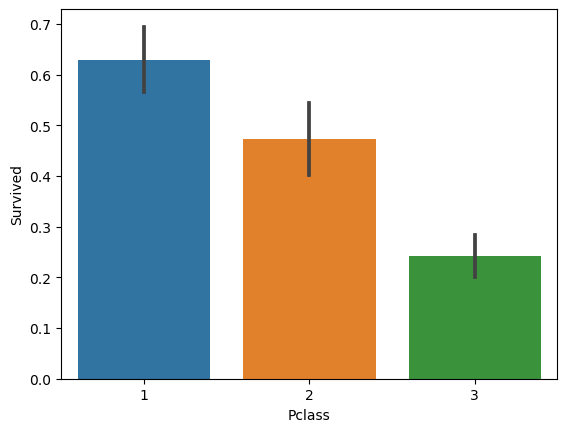

In [9]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train_data)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train_data["Survived"][train_data["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train_data["Survived"][train_data["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train_data["Survived"][train_data["Pclass"] == 3].value_counts(normalize = True)[1]*100)

#### Sex

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


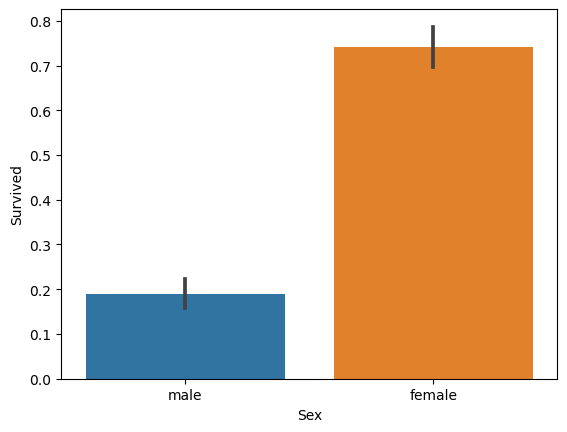

In [10]:
sns.barplot(x="Sex", y="Survived", data=train_data)


print("Percentage of females who survived:", train_data["Survived"][train_data["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train_data["Survived"][train_data["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

###### Conclusion: From the above graph it's quite obvious that females have more chances of survival in comparison to males.

#### Pclass vs Survived By Sex

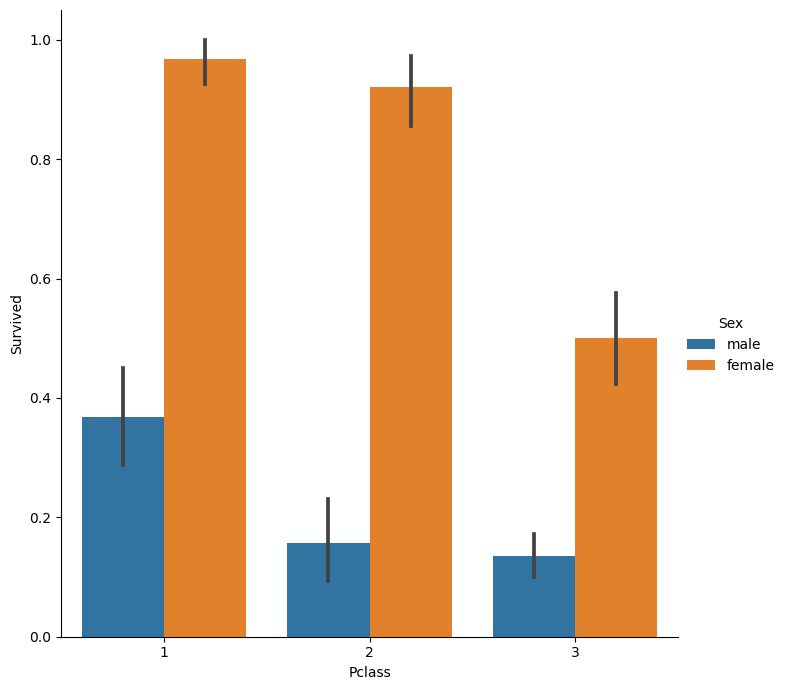

In [11]:
a = sns.catplot(x = "Pclass", y="Survived", hue="Sex", data=train_data, height = 7, kind="bar")

###### Conclusion:

In each class females have much higher chances of survival in comparison to male passengers.

#### SibSp - Number of Siblings / Spouses aboard the Titanic

In [12]:
# Finding unique values
train_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


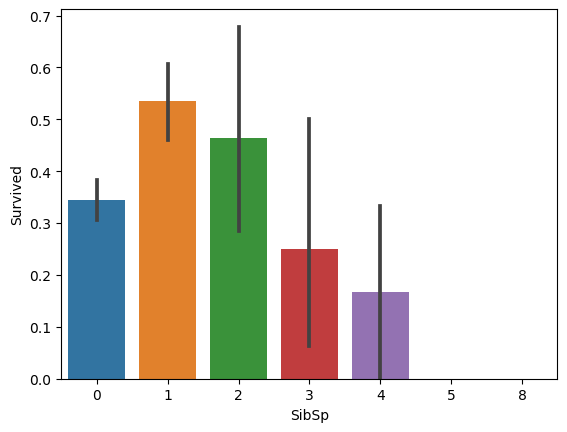

In [13]:
sns.barplot(x="SibSp", y="Survived", data=train_data)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", train_data["Survived"][train_data["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train_data["Survived"][train_data["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train_data["Survived"][train_data["SibSp"] == 2].value_counts(normalize = True)[1]*100)

#### Parch

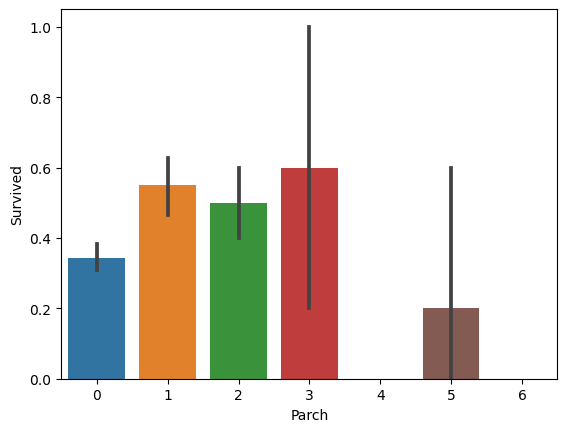

In [14]:
sns.barplot(x="Parch", y="Survived", data=train_data)
plt.show()

#### AGE

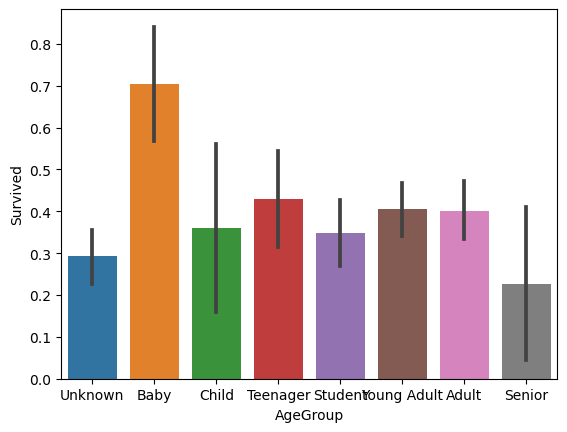

In [15]:
#sort the ages into logical categories
train_data["Age"] = train_data["Age"].fillna(-0.5)
test_data["Age"] = test_data["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_data['AgeGroup'] = pd.cut(train_data["Age"], bins, labels = labels)
test_data['AgeGroup'] = pd.cut(test_data["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train_data)
plt.show()

#### Cabin

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


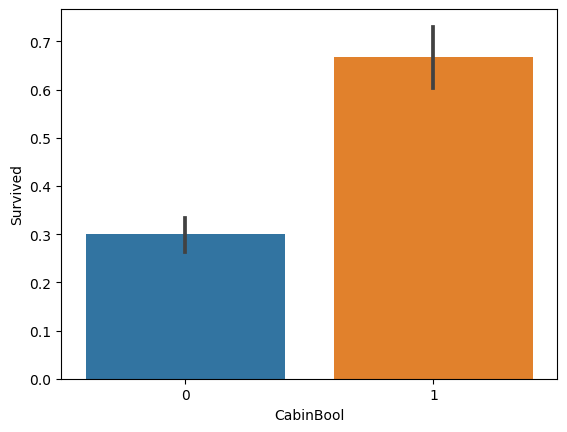

In [16]:
train_data["CabinBool"] = (train_data["Cabin"].notnull().astype('int'))
test_data["CabinBool"] = (test_data["Cabin"].notnull().astype('int'))

print("Percentage of CabinBool = 1 who survived:", train_data["Survived"][train_data["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train_data["Survived"][train_data["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train_data)
plt.show()

#### Embarked

In [17]:
train_data["Embarked"].isnull().sum()

2

In [18]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
# Filling 2 missing values with most frequent value
train_data["Embarked"] = train_data["Embarked"].fillna('S')

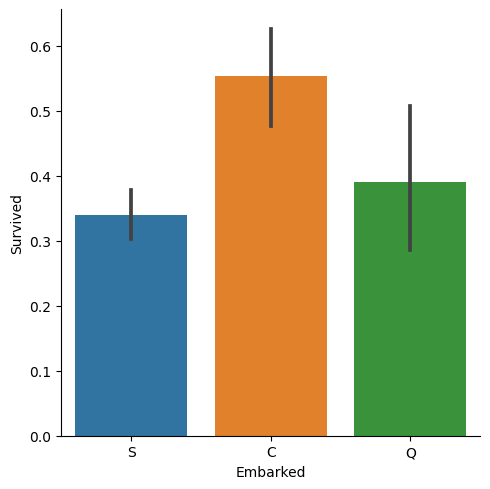

In [20]:
sns.catplot(x="Embarked", y="Survived", data=train_data, height = 5, kind="bar")

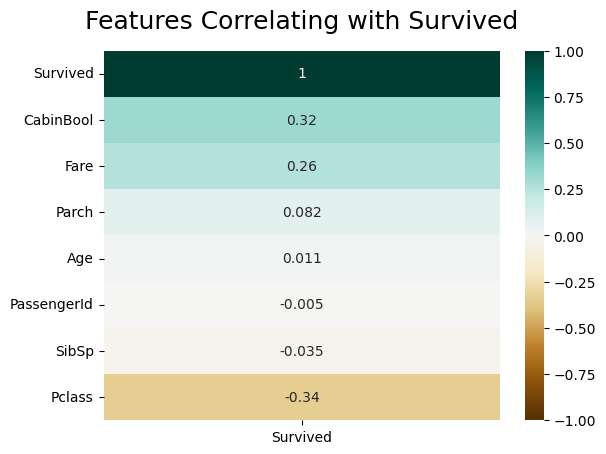

In [21]:
heatmap = sns.heatmap(train_data.corr()[['Survived']].sort_values(by='Survived', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Survived', fontdict={'fontsize':18}, pad=16);

### Data Preprocessing (Cleaning)

In [22]:
test_data.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [23]:
train_data = train_data.drop(['Cabin'], axis = 1)
test_data = test_data.drop(['Cabin'], axis = 1)

In [24]:
train_data = train_data.drop(['Ticket'], axis = 1)
test_data = test_data.drop(['Ticket'], axis = 1)

In [25]:
print("Number of people embarking in Southampton (S):")
southampton = train_data[train_data["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train_data[train_data["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train_data[train_data["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
646
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [26]:
train_data = train_data.fillna({"Embarked": "S"})

In [27]:
#create a combined group of both datasets
combine = [train_data, test_data]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [28]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [29]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [30]:
# fill missing age with mode age group for each title
mr_age = train_data[train_data["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train_data[train_data["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train_data[train_data["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train_data[train_data["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train_data[train_data["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train_data[train_data["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}
for x in range(len(train_data["AgeGroup"])):
    if train_data["AgeGroup"][x] == "Unknown":
        train_data["AgeGroup"][x] = age_title_mapping[train_data["Title"][x]]
        
for x in range(len(test_data["AgeGroup"])):
    if test_data["AgeGroup"][x] == "Unknown":
        test_data["AgeGroup"][x] = age_title_mapping[test_data["Title"][x]]

In [31]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train_data['AgeGroup'] = train_data['AgeGroup'].map(age_mapping)
test_data['AgeGroup'] = test_data['AgeGroup'].map(age_mapping)

train_data.head()

#dropping the Age feature for now, might change
train_data = train_data.drop(['Age'], axis = 1)
test_data = test_data.drop(['Age'], axis = 1)

In [32]:
train_data = train_data.drop(['Name'], axis = 1)
test_data = test_data.drop(['Name'], axis = 1)

In [33]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train_data['Sex'] = train_data['Sex'].map(sex_mapping)
test_data['Sex'] = test_data['Sex'].map(sex_mapping)

train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


In [34]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)

train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


In [35]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test_data["Fare"])):
    if pd.isnull(test_data["Fare"][x]):
        pclass = test_data["Pclass"][x] #Pclass = 3
        test_data["Fare"][x] = round(train_data[train_data["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4, labels = [1, 2, 3, 4])
test_data['FareBand'] = pd.qcut(test_data['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train_data = train_data.drop(['Fare'], axis = 1)
test_data = test_data.drop(['Fare'], axis = 1)

In [36]:
#check train data
train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [37]:
#check test data
test_data.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2


### Correlation Plot:

<AxesSubplot:>

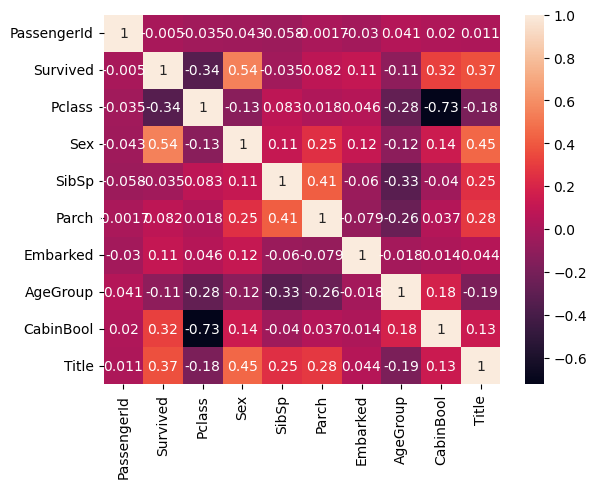

In [38]:
corr = train_data.corr()
sns.heatmap(corr, annot=True)

### Modeling the data:

In [39]:
from sklearn.model_selection import train_test_split

predictors = train_data.drop(['Survived', 'PassengerId'], axis=1)
target = train_data["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [40]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


In [41]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.7


In [42]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.74


In [43]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

78.68


In [44]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

80.71


In [45]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

84.77


In [46]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.26


##### Let us table our model accuracies:

In [47]:
models = pd.DataFrame({
    'Model': ['Gaussian Naive Bayes','Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_linear_svc, acc_decisiontree, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,84.77
6,Gradient Boosting Classifier,84.26
0,Gaussian Naive Bayes,82.74
5,Decision Tree,80.71
1,Support Vector Machines,79.70
3,Random Forest,78.68
4,Linear SVC,78.68


##### The highest model accuracy for the testing data is achieved with the Gradient Boosting Classifier Model, it predicted the survival numbers for the testing set with a score of 84.77%. 